In [11]:
import pandas as pd
df = pd.read_csv("netflix1.csv")
df = df.drop_duplicates()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
df = df.drop_duplicates()

# Strip whitespace from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract duration number and type into separate columns
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# Convert 'release_year' to string
df['release_year'] = df['release_year'].astype(str)

# Standardize column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')


# Show confirmation
print("Data type conversions complete. Cleaned file saved as 'netflix1_converted.csv'")

Data type conversions complete. Cleaned file saved as 'netflix1_converted.csv'


<Figure size 1200x600 with 0 Axes>

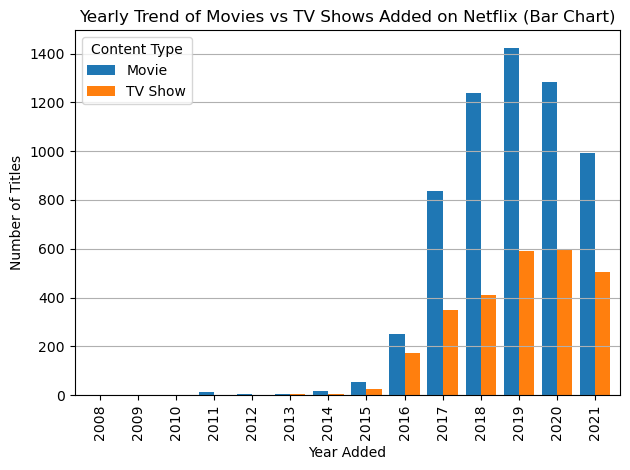

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('netflix1.csv')  # Make sure the path is correct

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by year and content type
content_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting as a bar chart
plt.figure(figsize=(12, 6))
content_trend.plot(kind='bar', width=0.8)
plt.title('Yearly Trend of Movies vs TV Shows Added on Netflix (Bar Chart)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Load your data
df = pd.read_csv('netflix1.csv')  # Make sure the path is correct

# Create a new feature 'content_age'
current_year = pd.Timestamp.now().year
df['content_age'] = current_year - df['release_year']

# View sample
print(df[['title', 'release_year', 'content_age']].head())


                              title  release_year  content_age
0              Dick Johnson Is Dead          2020            5
1                         Ganglands          2021            4
2                     Midnight Mass          2021            4
3  Confessions of an Invisible Girl          2021            4
4                           Sankofa          1993           32


In [28]:
pip install pandas matplotlib seaborn wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



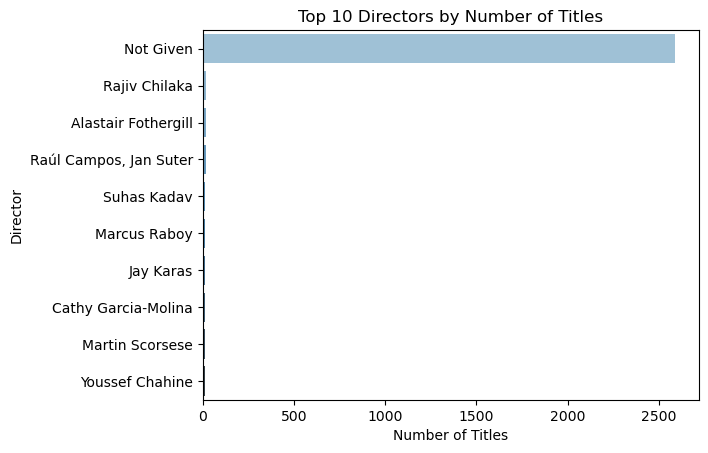

In [36]:
# 4. Top 10 Directors
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

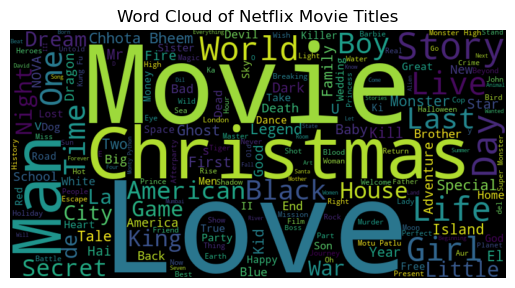

In [40]:
# 5. Word Cloud of Movie Titles
from wordcloud import WordCloud
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Movie Titles')
plt.show()


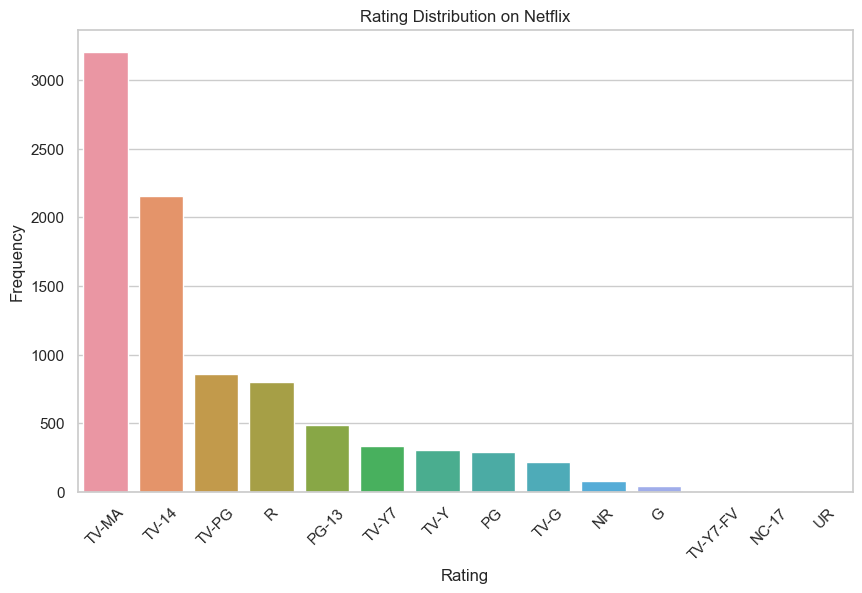

In [50]:
# 6. Ratings Distribution
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title('Rating Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create 'month_added' and 'year_added' columns
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year


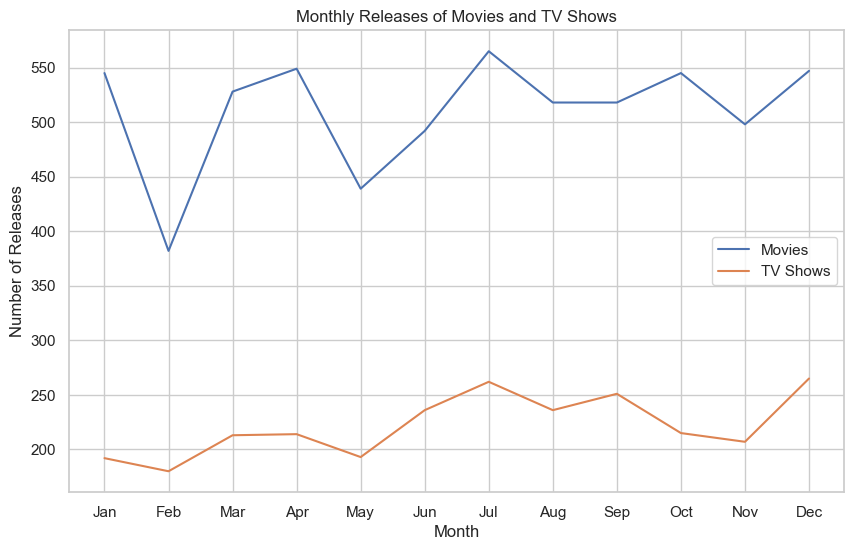

In [64]:
# Group by month for each type, and count entries
monthly_movie = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_show = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

# Ensure indexes are integers and sorted correctly
monthly_movie = monthly_movie.reindex(range(1, 13), fill_value=0)
monthly_show = monthly_show.reindex(range(1, 13), fill_value=0)

# Plot
plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_show.index, monthly_show.values, label='TV Shows')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Movies and TV Shows")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid(True)
plt.show()


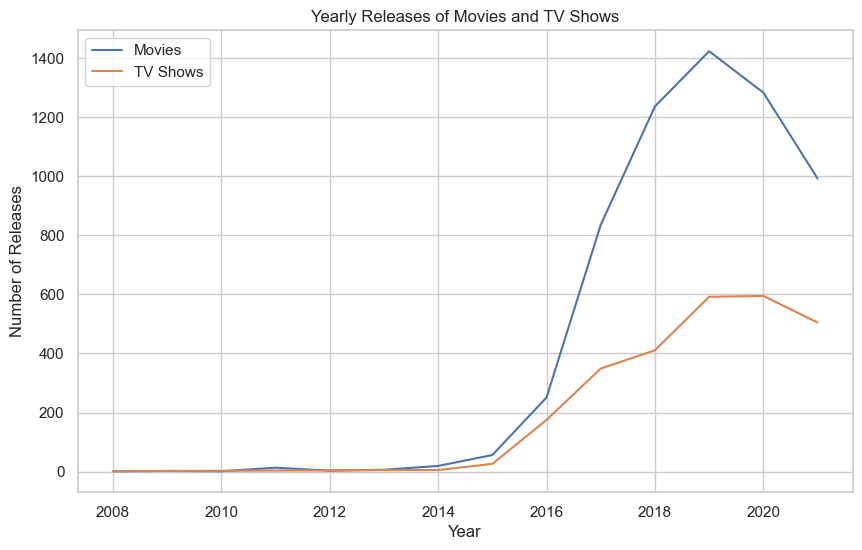

In [66]:
# 8. Yearly Releases
yearly_movie = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_show = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie.index, yearly_movie.values, label='Movies')
plt.plot(yearly_show.index, yearly_show.values, label='TV Shows')
plt.title("Yearly Releases of Movies and TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid(True)
plt.show()

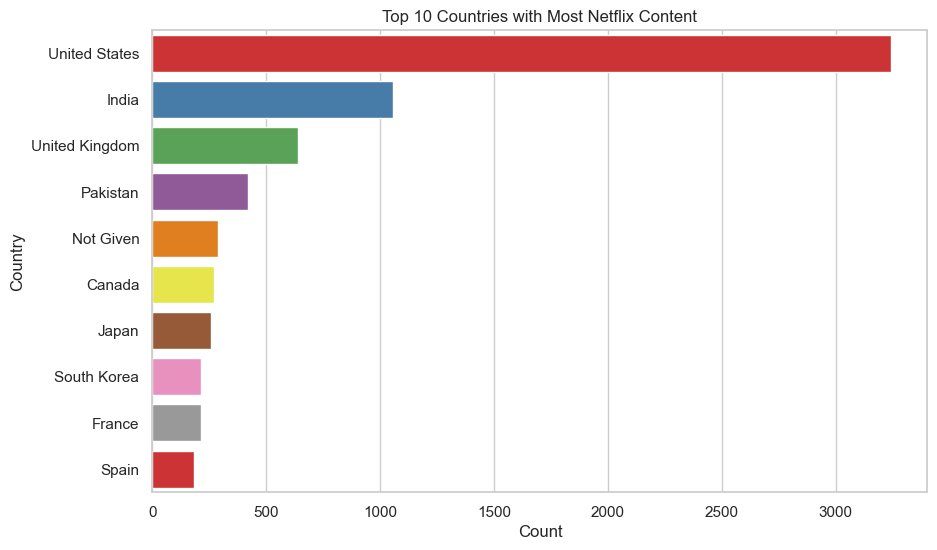

In [68]:
# 9. Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set1')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

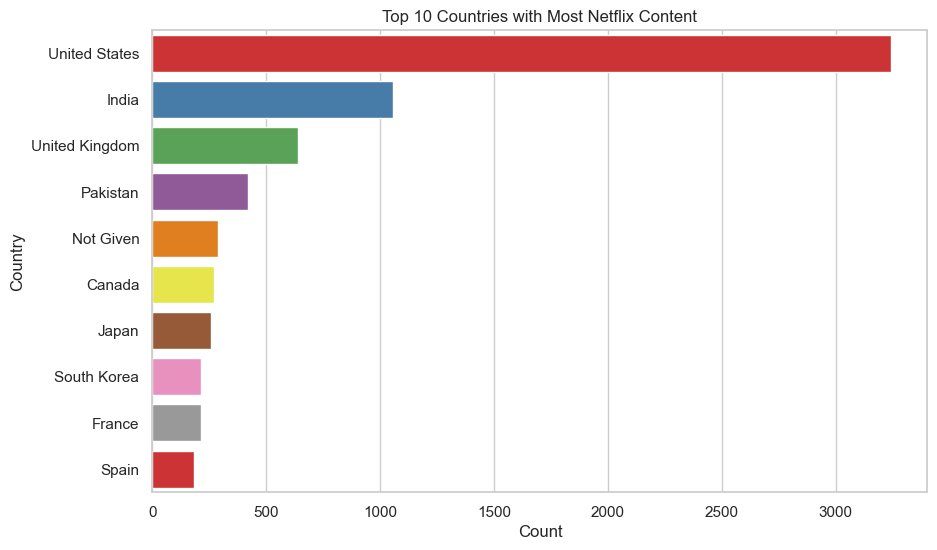

In [68]:
# 9. Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set1')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [74]:
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'content_age', 'month_added', 'year_added']
['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'content_age', 'month_added', 'year_added']


In [78]:
# Use only available columns for combining (adjusted version)
df['combined'] = df['title'].fillna('') + ' ' + df['listed_in'].fillna('') + ' ' + df['director'].fillna('')


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Index mapping
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return ["Title not found."]
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example
print(get_recommendations("Narcos"))


7356            Narcos: Mexico
7685          When They See Us
7319                       She
424     Inside the Real Narcos
7456                 The Crime
8408                Crime Time
7307                    Happy!
486                  The Truth
6602                   Q-Force
7988         Somewhere Between
Name: title, dtype: object
